# Multivariate Linear Regression – From Scratch with NumPy

## Table of Contents
- [1. Introduction](#1-introduction)
  - [1.1. Univariate Linear Regression](#11-univariate-linear-regression)
  - [1.2. The Linear Function (univariate)](#12-the-linear-function(univariate))
  - [1.3. Loss Function: Mean Squared Error](#13-loss-function-mean-squared-error-mse)
  - [1.4. Matrix Formulation (Multivariate Case)](#14-matrix-formulation-multivariate-case)
- [2. Univariate Linear Regression](#2-univariate-linear-regression)
  - [2.1 Visualizing Simple Data](#21-visualizing-simple-data)
  - [2.2 Closed-Form Solution (Univariate)](#22-closed-form-solution-univariate)
  - [2.3 Comparison with sklearn](#23-comparison-with-sklearn)
- [3. Multivariate Linear Regression](#3-multivariate-linear-regression)
  - [3.1 Matrix Formulation](#31-matrix-formulation)
  - [3.2 Dataset Creation](#32-dataset-creation)
  - [3.3 Closed-Form Solution (Multivariate)](#33-closed-form-solution-multivariate)
  - [3.4 3D Plane Visualization](#34-3d-plane-visualization)
  - [3.5 Manual Evaluation (MSE & R²)](#35-manual-evaluation-mse--r)
- [4. Interpretation and Final Conclusions](#4-interpretation-and-final-conclusions)


## 1. Introduction

Linear regression is one of the most fundamental techniques in Machine Learning. Its purpose is to model the relationship between one or more input variables (features) and a continuous output (target). The output is predicted as a **linear combination** of the inputs.

Imagine you want to predict someone's height, and the only variable that matters — after analyzing all others — is hair color. Then, we would say that this independent variable has **100% of the weight** when predicting the dependent outcome. Although it's a surreal analogy, it helps introduce a key idea:

> The **weight** (or coefficient) represents the importance we assign to each independent variable $X_i$ when predicting the dependent variable $y$.

---

### 1.1. Univariate Linear Regression

Just like in the previous example, "univariate" means we’re using only one variable to predict the output.

For example, (another surreal analogy) imagine you’re tossing a rigged coin, and the outcome depends solely on whether you throw it with your right or left hand. In this case, that hand variable would carry **all** the predictive power — a 100% weight once again.

But what happens if other factors also matter? Let’s say that the **height** from which you throw the coin also affects the outcome. Perhaps now:

- 50% of the outcome depends on the hand you use
- 50% depends on the height

This would be a **multivariable regression problem**, and we’d assign a coefficient (or weight) to both variables. Each coefficient quantifies how much that variable contributes to the prediction.

Understanding this is key before diving into the math: **regression is about learning the right weights for the right variables.** Although we are missing a crucial part for the moment, which is the error (part of the outcome that cannot be explained solely by the independent variables).

---

### 1.2. The Linear Function (univariate)

The model assumes a linear function of the form:

$$
y = mx + b
$$

Where:

- $y$: target (dependent) variable  
- $x$: input (independent) variable  
- $m$: slope (how much $y$ increases per unit of $x$)  
- $b$: intercept (value of $y$ when $x = 0$)

We aim to find the values of $m$ and $b$ that best fit the observed data by minimizing the error between predictions and actual values.

**Simple Terms: Slope and Intercept**

Imagine drawing a straight line through a scatter of points.

- The **slope** tells you how tilted that line is. If it's steep, then a small increase in $x$ causes a big jump in $y$.  
  Think: for every extra hour you study, how much higher will your test score be? That’s the slope.

- The **intercept** is where the line crosses the $y$-axis.  
  Think: if you didn’t study at all, what’s your base score? That’s the intercept.

So basically, the line tries to answer:
> “Where do we start (intercept), and how fast do we grow (slope)?”

---

### 1.3. Loss Function: Mean Squared Error (MSE)

**Simple Terms: Mean Squared Error (MSE)**

Let’s go back to the height example (used in the first paragraph). Imagine your model predicts people’s height pretty well, but it's usually off by around 2 to 5 cm — sometimes predicting a bit too much, sometimes too little.

The **Mean Squared Error** takes all these small mistakes (called "residuals"), squares them (to turn negatives into positives), and averages them.

Why square them? Because otherwise, overestimating and underestimating would cancel each other out — and you’d get a misleadingly low error. By squaring, we make sure every mistake counts, regardless of direction.

So in simple terms:
- The smaller the MSE, the better the model
- The bigger the MSE, the more off our predictions are — on average

---

### 1.4. Matrix Formulation (Multivariate Case)

When there are multiple features, we express the model in matrix form, because there is no better way to manipulate multiple linear dimensions than matrices. (Watch PCA notebook in this repository for deeper understanding)

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Where:

- $\mathbf{X} \in \mathbb{R}^{n \times p}$: design matrix (features, including a column of 1s for the intercept)
- $\boldsymbol{\beta} \in \mathbb{R}^{p \times 1}$: vector of coefficients (weights)
- $\mathbf{y} \in \mathbb{R}^{n \times 1}$: output vector
- $\boldsymbol{\epsilon}$: residuals (prediction errors)

The solution that minimizes the squared error is given by:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This closed-form expression gives the best-fitting coefficients under the **ordinary least squares (OLS)** criterion.

**NOTE**: This final explanation was very brief, mainly because I think it's way more complicated to understand through theory than univariate, so I will be diving deeper in the code cells bellow.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 2. Univariate Linear Regression

Objective: Create a synthetic dataset where we control the slope, intercept, and noise — so we know what the “truth” is and can test how well our model recovers it. Also, create a non noise plot so we can visually understand what noise means.

### 2.1. Visualizing simple data

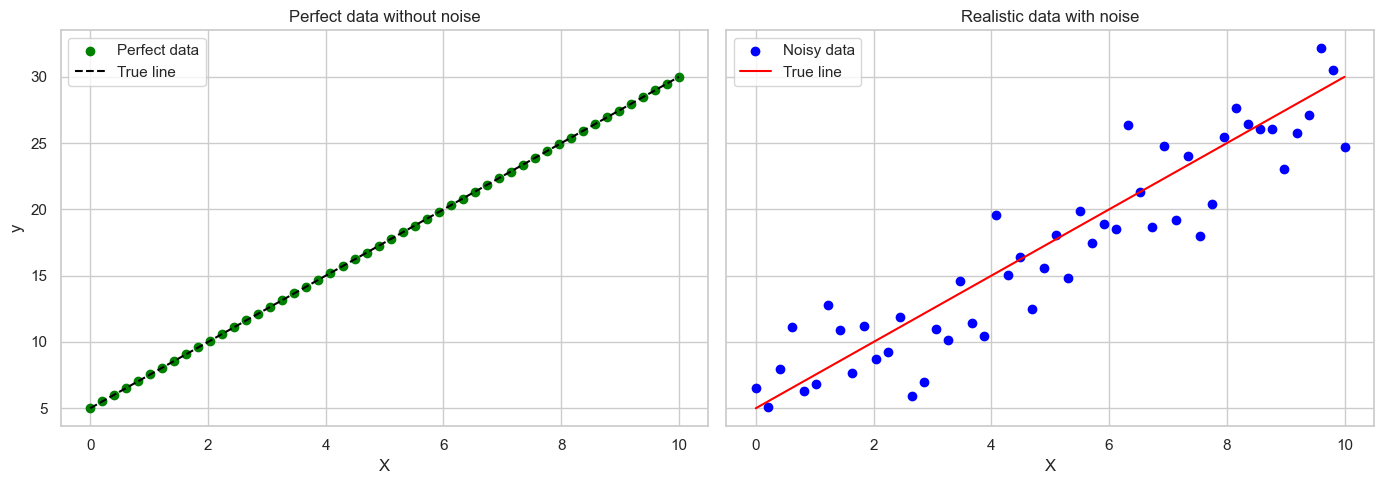

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Reproducibility
np.random.seed(42)

# True parameters of the line (our "ground truth")
true_slope = 2.5
true_intercept = 5

# Generate 50 values for x (input)
X = np.linspace(0, 10, 50)

# Simulate noise (normally distributed with mean 0 and std deviation 3)
noise = np.random.normal(loc=0, scale=3, size=X.shape)

# Generate using the line equation + noise
y = true_slope * X + true_intercept + noise

# Wrap in DataFrame for easier handling
df = pd.DataFrame({
    'X': X,
    'y': y
})

y_perfect = true_slope * X + true_intercept

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left plot: no noise
axes[0].scatter(X, y_perfect, color='green', label='Perfect data')
axes[0].plot(X, y_perfect, color='black', linestyle='--', label='True line')
axes[0].set_title("Perfect data without noise")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# Right plot: with noise
axes[1].scatter(X, y, color='blue', label='Noisy data')
axes[1].plot(X, y_perfect, color='red', label='True line')
axes[1].set_title("Realistic data with noise")
axes[1].set_xlabel("X")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 2.2. Closed-Form Solution (Univariate)

We use the following formulas to compute the best-fitting line:

$$
m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\qquad
b = \bar{y} - m \cdot \bar{x}
$$

---

### But why do we multiply the deviations in the numerator?

The slope formula for linear regression includes this expression:

$$
\sum (x_i - \bar{x})(y_i - \bar{y})
$$

This might look like just a bunch of numbers multiplied together — but there’s something deeper going on.

---

### Intuition behind the multiplication

Just like basic sign rules:

- When both $x_i$ and $y_i$ are **above their means**, the product is **positive**
- When one is above and the other is below, the product is **negative**
- When there’s **no consistent pattern**, the positives and negatives cancel out

This means we’re measuring **how often $x$ and $y$ move together**.

In a way, it’s like asking:
> “When $x$ increases, does $y$ usually increase too?”

That’s why this is **very similar to a dot product** between the centered vectors $(x - \bar{x})$ and $(y - \bar{y})`$.

---

### Is this a dot product?

Not exactly — we're not doing matrix multiplication or using vector norms — but conceptually, it plays the **same role**:  
It tells us **how aligned** the changes in $x$ and $y$ are.

This becomes a real dot product when we move to **multivariable regression** and use matrix notation.

### Simple explanation

- We first **center** the data by subtracting the mean (denoted as $\bar{x}$ and $\bar{y}$)
- Then, in the **numerator**, we multiply how much each $x_i$ and $y_i$ deviate from their means — this tells us **how related** their changes are
- In the **denominator**, we square the deviation of $x_i$ to ensure no cancellation happens due to negative signs
- The slope $m$ tells us **how much $y$ increases for each unit of $x$**
- Once we know the slope, the intercept $b$ is just the starting point — the value of $y$ when $x = 0$

---

### Final intuition

- If the $x$ and $y$ values **move together** (when $x$ increases, $y$ increases too), then $m$ will be positive
- If they move in **opposite directions**, $m$ will be negative
- If there’s **no clear pattern**, $m$ will be close to 0

The intercept $b$ simply **shifts the line up or down** so it best fits the data.


In [4]:
# Calculate slope and intercept manually (numpy)

# Step 1: Compute the means
X_mean = np.mean(X)
y_mean = np.mean(y)

# Step 2: Compute the numeratos and denominator of the slope
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# Step 3: Calculate the slope and intercept
m_manual = numerator / denominator
b_manual = y_mean - m_manual * X_mean

# Print the manually calculated slope and intercept
print(f"Manual calculation: Slope = {m_manual:.2f}, Intercept = {b_manual:.2f}")

# Calculate slope and intercept using numpy's polyfit to compare
m_numpy, b_numpy = np.polyfit(X, y, 1)

# Print the numpy calculated slope and intercept
print(f"Numpy calculation: Slope = {m_numpy:.2f}, Intercept = {b_numpy:.2f}")

Manual calculation: Slope = 2.33, Intercept = 5.19
Numpy calculation: Slope = 2.33, Intercept = 5.19


### 2.3. Comparison with sklearn

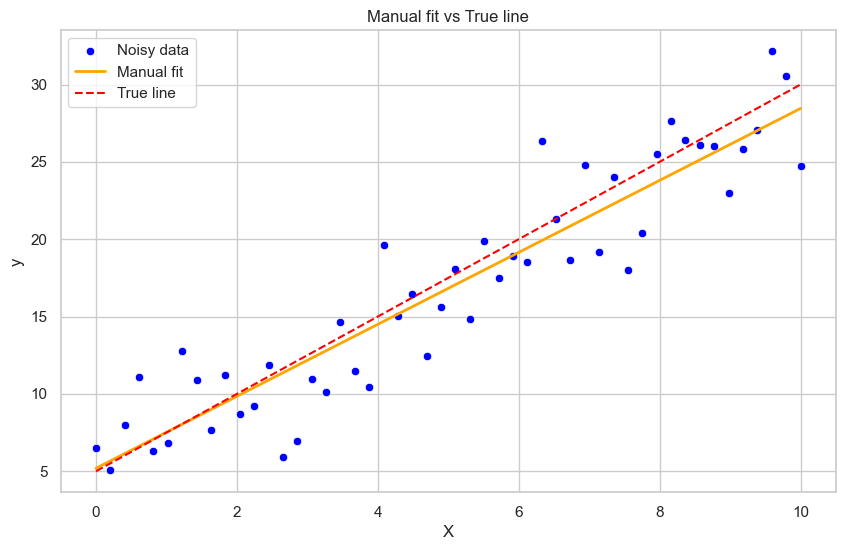

In [5]:
# Visualize the results

# Compute predictions using the manual slope and intercept
y_pred_manual = m_manual * X + b_manual

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, color='blue', label='Noisy data')
plt.plot(X, y_pred_manual, color='orange', label='Manual fit', linewidth=2)
plt.plot(X, y_perfect, color='red', label='True line', linestyle='--')
plt.title("Manual fit vs True line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Sklearn slope (m): 2.326
Sklearn intercept (b): 5.193


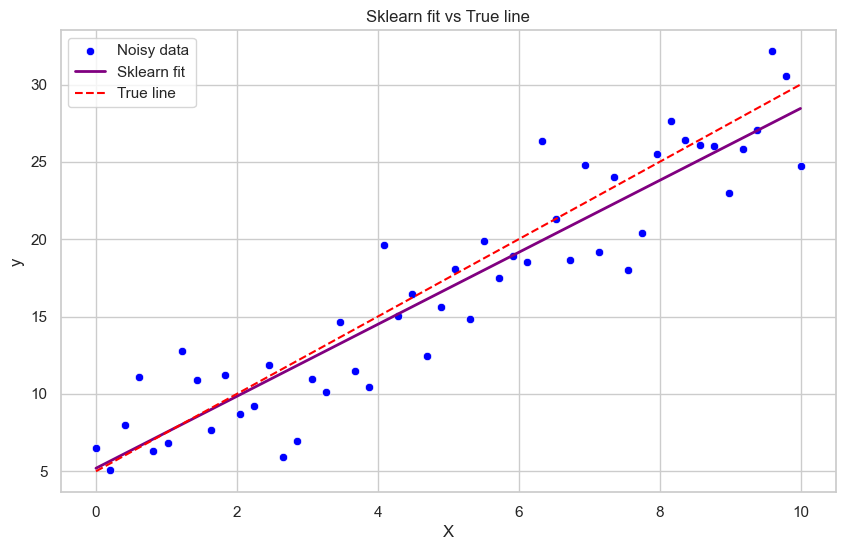

In [6]:
# Comapre with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression

# Reshape X to 2D for sklearn (expected shape: (n_samples, n_features))
X_reshaped = X.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X_reshaped, y)

# Extract learned parameters
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Sklearn slope (m): {m_sklearn:.3f}")
print(f"Sklearn intercept (b): {b_sklearn:.3f}")

# Visualize the sklearn results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, color='blue', label='Noisy data')
plt.plot(X, m_sklearn * X + b_sklearn, color='purple', label='Sklearn fit', linewidth=2)
plt.plot(X, y_perfect, color='red', label='True line', linestyle='--')
plt.title("Sklearn fit vs True line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 3. Multivariate linear regression

### 3.1. Matrix Formulation

#### Derivate of normal equation

We want to find the coefficients $\boldsymbol{\beta}$ that minimize **median quadratic error** between real values: $\mathbf{y}$ and the predicted ones by the model: $\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\beta}$.

---

#### Objective

Minimize the cost function (quadratic error):

$$
J(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X} \boldsymbol{\beta}\|^2 = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

---

#### Step 1: Expand the expression

$$
J(\boldsymbol{\beta}) = \mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}
$$

This can be deduced with linear algebra rules. This is the equivalent to solving a quadratic problem:

$$
(a - b)^2 = a^2 - 2ab + b^2
$$

---

#### Step 2: Derivate regarding $\boldsymbol{\beta}$

We want to minimize $J(\boldsymbol{\beta})$, so we derivate regarding $\boldsymbol{\beta}$:

$$
\frac{\partial J}{\partial \boldsymbol{\beta}} = -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta}
$$

---

#### Step 3. Equal to 0 (local minimum condition)

$$
-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = 0
$$

$$
\Rightarrow \mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}
$$

This equation is called **normal system**.

---

#### Step 4. Clear $\boldsymbol{\beta}$

Si $\mathbf{X}^T\mathbf{X}$ is invertible:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This is the **unique vector** that minimizes the error...

---

#### Personal notes

- This derivation is possible mainly because $\mathbf{X}$ y $\mathbf{y}$ are in matrix form and we are able to aply matrix calculations.
- The critical step, in my opinion, is to understand that we are trying to minimize a multidimensional parable (quadratic function) thus we have a unique solution.


### 3.2. Dataset Creation

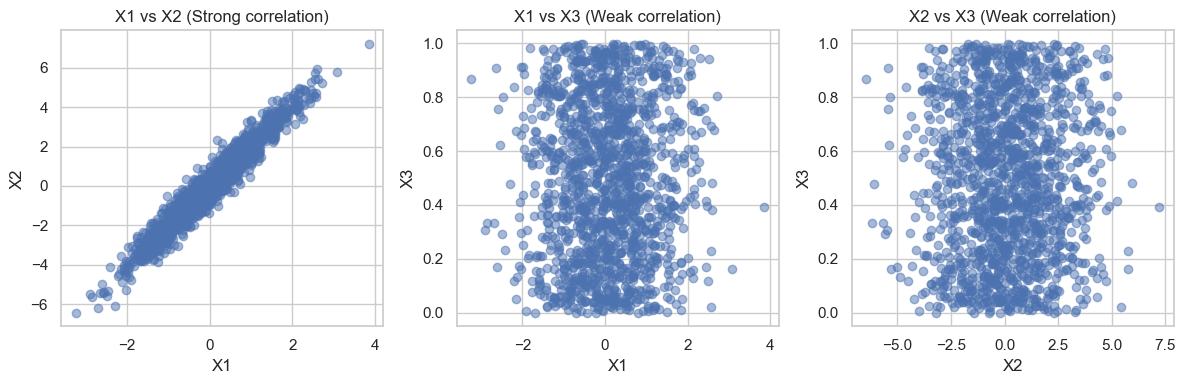

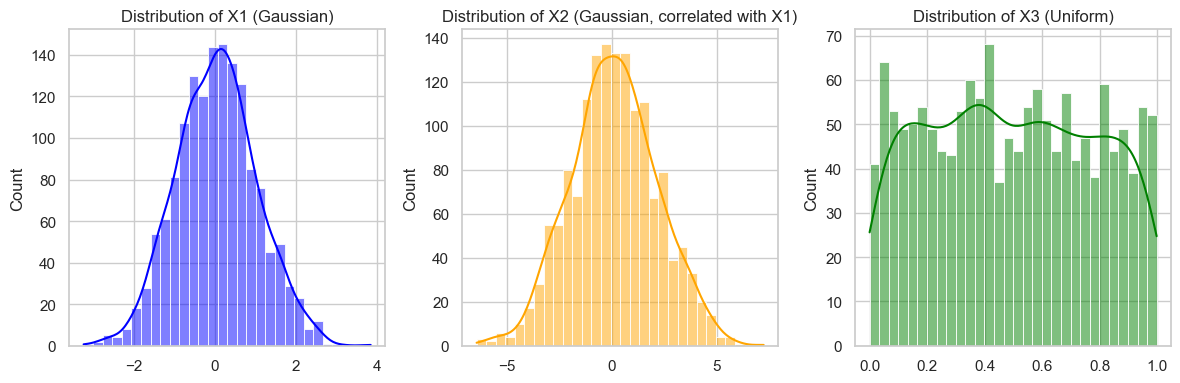

In [14]:
# Let's create a multivariate dataset 

np.random.seed(42)
sns.set(style="whitegrid")

# Create base data
n = 1500

# 3 variables: X1, X2, and X3
X1 = np.random.normal(0, 1, n) # Gaussian standard
X2 = 2 * X1 + np.random.normal(0, 0.5, n) # Strongly correlated with X1 (multicollinearity)
X3 = np.random.uniform(0, 1, n) # Uniform distribution


# Little plot to visualize and understand each variable
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X1, X2, alpha=0.5)
plt.title("X1 vs X2 (Strong correlation)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.subplot(1, 3, 2)
plt.scatter(X1, X3, alpha=0.5)
plt.title("X1 vs X3 (Weak correlation)")
plt.xlabel("X1")
plt.ylabel("X3")
plt.subplot(1, 3, 3)
plt.scatter(X2, X3, alpha=0.5) 
plt.title("X2 vs X3 (Weak correlation)")
plt.xlabel("X2")
plt.ylabel("X3")
plt.tight_layout()
plt.show()

# Plot distributions of each variable to understand their characteristics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(X1, kde=True, color='blue', bins=30)
plt.title("Distribution of X1 (Gaussian)")
plt.subplot(1, 3, 2)
sns.histplot(X2, kde=True, color='orange', bins=30)
plt.title("Distribution of X2 (Gaussian, correlated with X1)")
plt.subplot(1, 3, 3)
sns.histplot(X3, kde=True, color='green', bins=30)
plt.title("Distribution of X3 (Uniform)")
plt.tight_layout()
plt.show()


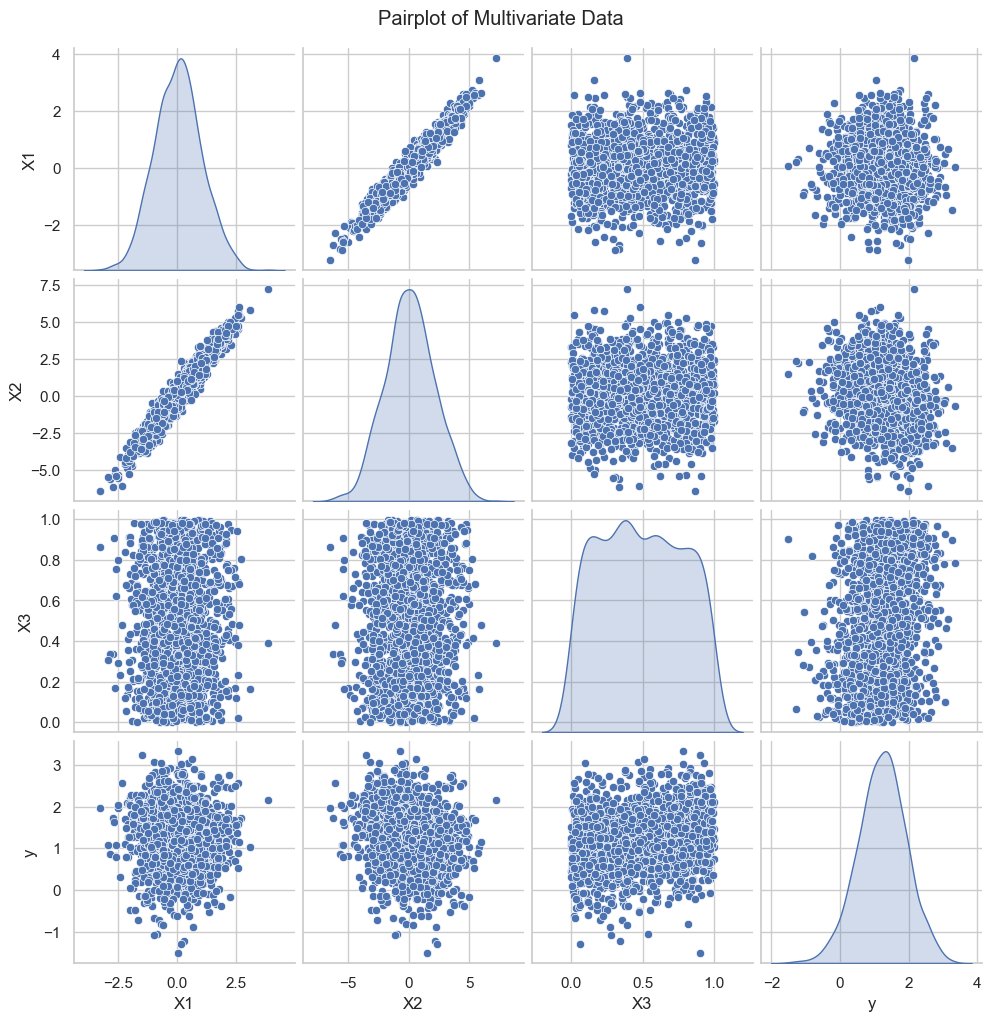

In [15]:
# Continue with the multivariate regression analysis

# Combine variables as columns
X_raw = np.column_stack((X1, X2, X3))

# Add column of ones for intercept -> design matrix
X = np.c_[np.ones(n), X_raw]

# # Real coefficients to generate y (ground truth)
beta_true = np.array([1, 2, -1, 0.5])  # [Intercept + coefficients for X1, X2, X3]

# Generate y using the linear equation with some noise y = Xβ + ε (ε is noise)
noise = np.random.normal(0, 0.5, n)  # Noise
y = X.dot(beta_true) + noise

# Wrap in DataFrame for easier handling and visualization
df_multivariate = pd.DataFrame(X_raw, columns=['X1', 'X2', 'X3'])
df_multivariate['y'] = y

# Pairplot to visualize relationships
sns.pairplot(df_multivariate, diag_kind='kde', markers='o')
plt.suptitle("Pairplot of Multivariate Data", y=1.02)
plt.show()

### 3.3. Closed-Form Solution (Multivariate)

In [24]:
# Calculate coefficients using numpy operations

# Note: Although the dataset has strong multicollinearity, we will still compute the coefficients using the normal equation method. Later, we will discuss the implications of multicollinearity and compare
# with pseudo-inverse method.

# Matrix X^T * X
X_transpose_X = np.dot(X.T, X)

# Matrix X^T * y
X_transpose_y = np.dot(X.T, y)

# Closed form solution: β = (X^T * X)^(-1) * (X^T * y)
beta_hat = np.linalg.inv(X_transpose_X).dot(X_transpose_y)

# Print the calculated coefficients
print("Calculated coefficients (beta_hat):")
for i, coef in enumerate(beta_hat):
    print(f"Coefficient for X{i}: {coef:.3f}")

# Compare with true coefficients
print("\nTrue coefficients (beta_true):")
for i, coef in enumerate(beta_true):
    print(f"True coefficient for X{i}: {coef:.3f}")

Calculated coefficients (beta_hat):
Coefficient for X0: 0.977
Coefficient for X1: 1.995
Coefficient for X2: -0.996
Coefficient for X3: 0.510

True coefficients (beta_true):
True coefficient for X0: 1.000
True coefficient for X1: 2.000
True coefficient for X2: -1.000
True coefficient for X3: 0.500


### 3.4. 3D Plane Visualization

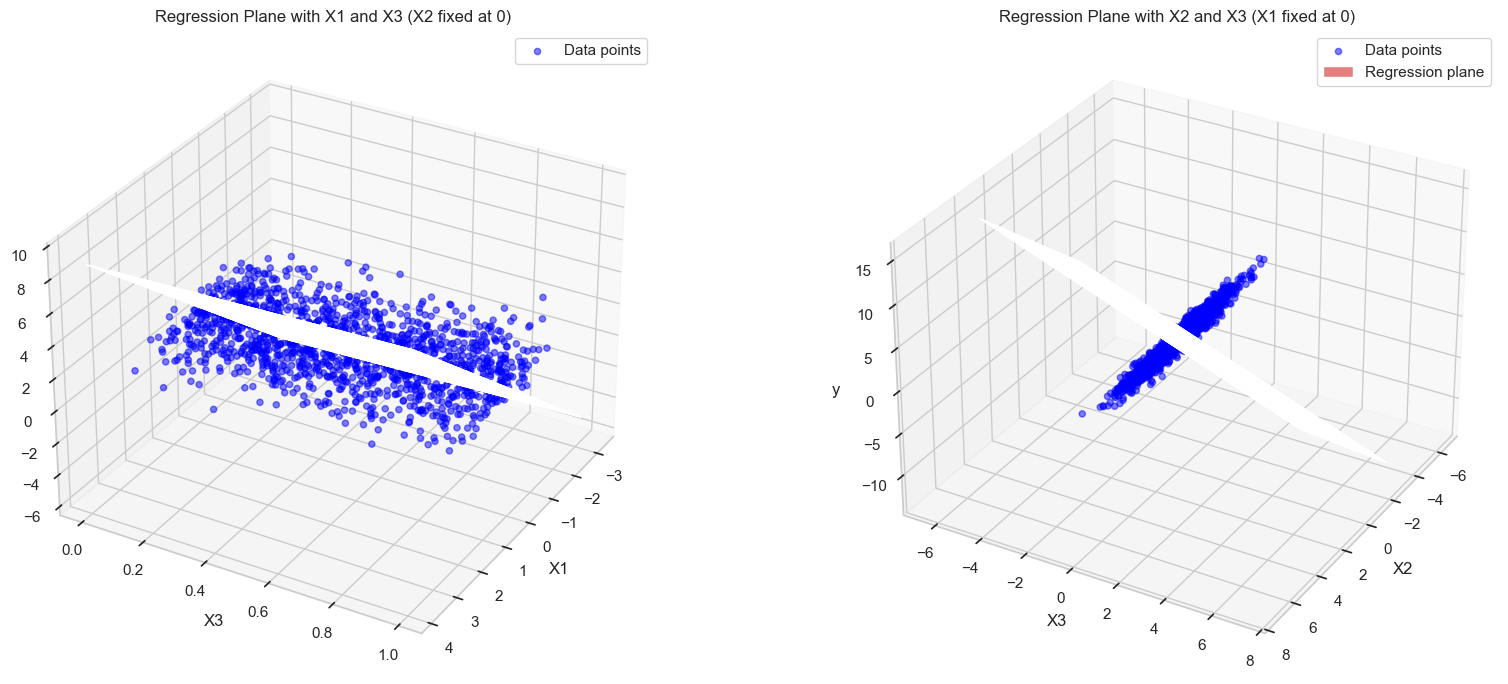

In [29]:
# Plot regression plane with X1 and X3 (Fix X2 equal to 0). Then, we will fix X3 to 0 and compare both plots.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18, 7))

# --------- FIRST PLOT: X1 AND X3, FIX X2 = 0 ---------
ax1 = fig.add_subplot(121, projection='3d')

x1 = X[:, 1]  # X1
x3 = X[:, 3]  # X3
x2_fixed = 0  # Fix X2 to 0

x1_surf, x3_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                               np.linspace(x3.min(), x3.max(), 100))

y_surf1 = (beta_hat[0]
           + beta_hat[1] * x1_surf
           + beta_hat[2] * x2_fixed
           + beta_hat[3] * x3_surf)

ax1.scatter(x1, x3, y, color='blue', alpha=0.5, label='Data points')
ax1.plot_surface(x1_surf, x3_surf, y_surf1, color='orange', alpha=0.4)
ax1.set_xlabel('X1')
ax1.set_ylabel('X3')
ax1.set_zlabel('y')
ax1.set_title('Regression Plane with X1 and X3 (X2 fixed at 0)')
ax1.legend()
ax1.view_init(elev=30, azim=30)  # Adjust the view angle for better visualization
ax1.grid(True)

# --------- SECOND PLOT: X2 AND X3, FIX X1 = 0 ---------
ax2 = fig.add_subplot(122, projection='3d')
x2 = X[:, 2]  # X2  
x3_fixed = 0

x1_surf2, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                                np.linspace(x2.min(), x2.max(), 100))

y_surf2 = (beta_hat[0]
           + beta_hat[1] * x1_surf2
           + beta_hat[2] * x2_surf
           + beta_hat[3] * x3_fixed)


ax2.scatter(x2, x3_fixed, y, color='blue', alpha=0.5, label='Data points')
ax2.plot_surface(x1_surf2, x2_surf, y_surf2, color='red', alpha=0.5, label='Regression plane')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
ax2.set_zlabel('y')
ax2.set_title('Regression Plane with X2 and X3 (X1 fixed at 0)')
ax2.legend()
ax2.view_init(elev=30, azim=30)  # Adjust the view angle for better visualization
plt.tight_layout()
plt.show()

### 3.5. Manual Evaluation (MSE & R²)


Manual MSE: 0.247
Manual R^2: 0.512


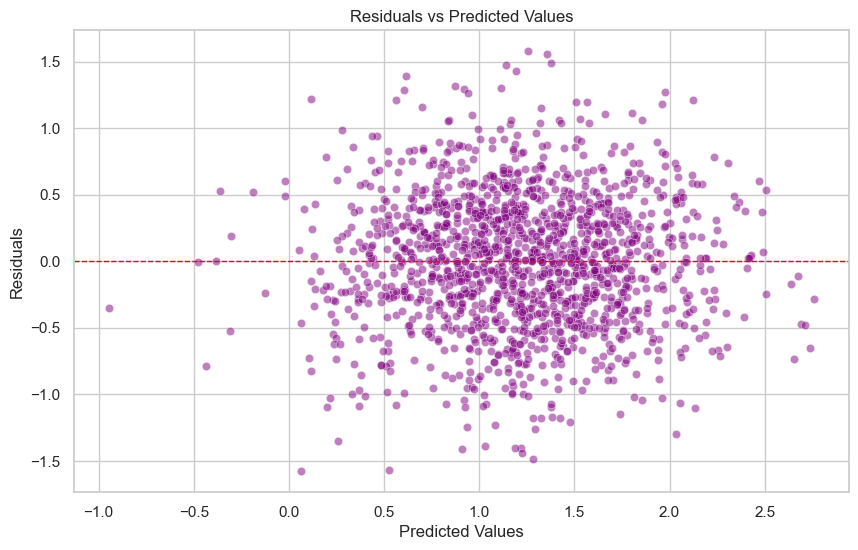


Sklearn coefficients (m): [ 1.9952202  -0.99582259  0.51003893]
Sklearn intercept (b): 0.977

Sklearn MSE: 0.247
Sklearn R^2: 0.512


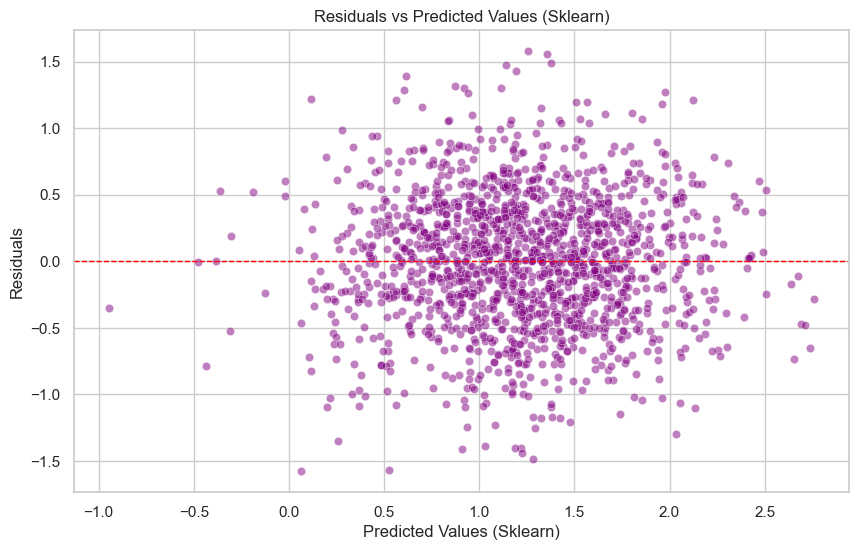


Comparison of coefficients:
Manual coefficients: [ 0.97684666  1.9952202  -0.99582259  0.51003893]
Sklearn coefficients: [ 0.97684666  1.9952202  -0.99582259  0.51003893]


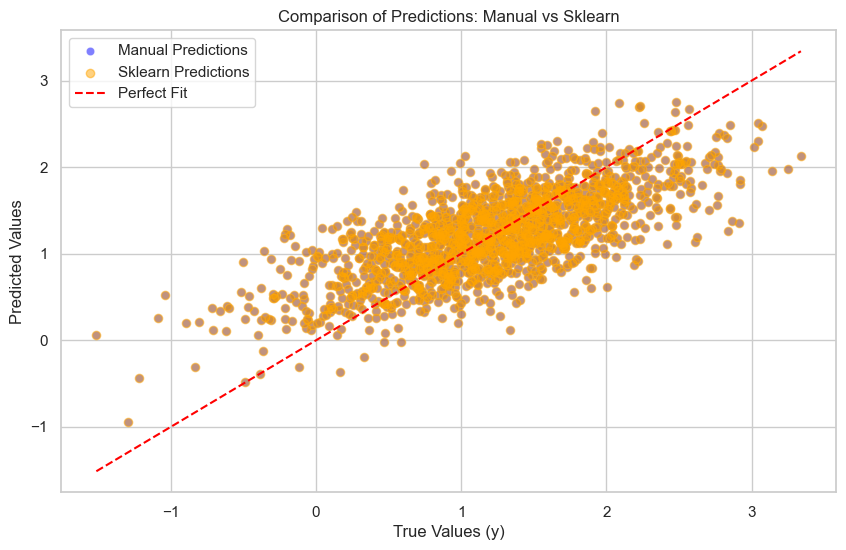

In [30]:
# Last step, manual predictions with beta_hat
y_pred_manual = X.dot(beta_hat)

# Quadratic error\
mse_manual = np.mean((y - y_pred_manual) ** 2)

# Coefficient of determination (R^2)
ss_res = np.sum((y - y_pred_manual) ** 2) # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r2_manual = 1 - (ss_res / ss_tot)

# Print the manual MSE and R^2
print(f"\nManual MSE: {mse_manual:.3f}")
print(f"Manual R^2: {r2_manual:.3f}")

# Visualization of residuals
residuals = y - y_pred_manual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_manual, y=residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Now let's compare with sklearn's LinearRegression for the multivariate case
# Fit the model using sklearn
model_multi = LinearRegression()

# Fit the model
model_multi.fit(X_raw, y)

# Extract learned parameters
m_sklearn_multi = model_multi.coef_
b_sklearn_multi = model_multi.intercept_ 
print(f"\nSklearn coefficients (m): {m_sklearn_multi}")
print(f"Sklearn intercept (b): {b_sklearn_multi:.3f}")

# Predictions using sklearn
y_pred_sklearn = model_multi.predict(X_raw)

# Calculate MSE and R^2 for sklearn predictions
mse_sklearn = np.mean((y - y_pred_sklearn) ** 2)
r2_sklearn = model_multi.score(X_raw, y)

# Print the sklearn MSE and R^2
print(f"\nSklearn MSE: {mse_sklearn:.3f}")
print(f"Sklearn R^2: {r2_sklearn:.3f}")

# Visualize the sklearn results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_sklearn, y=residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values (Sklearn)")
plt.xlabel("Predicted Values (Sklearn)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Compare the coefficients from manual calculation and sklearn
print("\nComparison of coefficients:")
print("Manual coefficients:", beta_hat)
print("Sklearn coefficients:", np.concatenate(([b_sklearn_multi], m_sklearn_multi)))

# The coefficients should be very similar, but due to numerical precision and the way sklearn handles multicollinearity,
# they might not be exactly the same.

# Visualize the predictions from both manual and sklearn methods
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred_manual, color='blue', label='Manual Predictions', alpha=0.5)
plt.scatter(y, y_pred_sklearn, color='orange', label='Sklearn Predictions', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Comparison of Predictions: Manual vs Sklearn") 
plt.xlabel("True Values (y)")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# This concludes the multivariate regression analysis.

## 4. Interpretation and Final Conclusions

In this multivariate section, we explored the relationship between the predicted and real `y` values.

**Plots 1 and 2** show a well-behaved residual distribution: the points are randomly scattered around the zero-error line. This is a good sign — if the points followed a visible pattern (e.g. a curve or slope), it would indicate that the model’s errors are biased.

To connect this with the first example from the notebook: imagine you're predicting people's heights. If the residual plot shows an upward trend, that would mean that as the true height increases, so does the model's error. This would suggest the model systematically underestimates or overestimates tall individuals — in other words, it fails to generalize for that range of data.

**Plot 3** compares predicted values to the actual ones. The diagonal red line represents perfect predictions (i.e., where `y = ŷ`). The distance from each dot to the line is the prediction error.

Although it’s not visually noticeable in the plot, I added:
- Blue points for manual predictions
- Orange points for sklearn predictions

The fact that most of the blue dots are overlapped by orange ones confirms that our manual implementation using NumPy matches sklearn's built-in regression, which means **we did a solid job overall**.
